# Chapter 4 Representing Data and Engineering Features
Categorical Variables
1. <strong>연속형 특성 데이터 (continuous feature)</strong> : 실수형 배열로 분포
2. <strong>범주형 특성 데이터 (categrized feature)</strong> : bin 이 특정되어 분포  ex) 브랜드, 색상, 판매분류
3. <strong>이산형 특성 데이터 (descrete feature)</strong> :

이들의 구분은 머신러닝 모델의 성능과 연관이 높다, 스케일 적용과 특성간의 상호작용 및 다항식 특성 추가 에 도움이 된다

<strong>특성공학(feature engineering)</strong> : 자료형의 특성에서 가장 적합한 데이터를 찾는 것으로, 매개변수 조절보다 성능에 큰 영향을 준다

<br></br>
## 1 범주형 변수
Categorical Variables

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ (미국 성인의 소득 데이터)

In [1]:
import pandas as pd
data = pd.read_csv('./data/adult.data', 
                   header=None, index_col=False, 
                   names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender', 
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                          'income'])
# 전체 데이터 중, 특정 필드만 추출
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()
# age, hour-per-week : 연속형 데이터
# workclass, education, gender, occupation : 범주형 특성

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### 01 One-Hot-encoding (가변수(dummy variable))
범주형 변수를 0 또는 1의 값을 갖는 하나 이상의 새로운 특성으로 바꾼다

<strong>pd.get_dummies()</strong>

<img src="http://brettromero.com/wordpress/wp-content/uploads/2016/03/OHE-Image.png" align="left" width="600">

In [2]:
# 범주형 데이터 문자열 확인
print(data.gender.value_counts())
print("\n원본특성(Original features):\n", list(data.columns), "\n")

 Male      21790
 Female    10771
Name: gender, dtype: int64

원본특성(Original features):
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 



In [3]:
data_dummies = pd.get_dummies(data)
print("get_dummies 작업 후 특성:\n", list(data_dummies.columns))
data_dummies.head()
# data_dummies.values : Numpy 배열로 전환하여 머신러닝 모델을 학습시킨다

get_dummies 작업 후 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Prot

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# Data 전처리 후 추출

# Slicing Index
# 1. 숫자로 인덱싱한 경우 : 마지막 숫자 영역은 제외
# 2. 문자로 인덱싱한 경우 : 마지막 영역을 포함
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values # NumPy arrays 로 추출
features.iloc[:2,-4:]

,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0


In [5]:
# Target 데이터 추출
# Target은 별도로 분리를 해야 한다! (주의 할 것!!)
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [6]:
# sklearn 모듈을 사용하여 로지스틱 훈련 모델을 생성한다

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수(Test score): {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수(Test score): 0.81


### 02 숫자로 표현된 범주형특성
범주형 문자열 인코딩시에도, 저장공간의 절약/ 데이터 취합 방식에 따라 숫자로 인코딩을 변경한다

하지만 이 경우, 설명이 없으면 <strong>연속적 데이터로 착각</strong>할 수 있다 (ex) 별점평가)

따라서, 데이터 특성을 분석시 <strong>특별한 설명이 없으면 '이산형 데이터'</strong>로 생각하고 접근해야 한다

In [7]:
# 숫자 특성과 범주형 문자열 특성을 갖는 DataFrame을 생성한다
demo_df = pd.DataFrame({'숫자_데이터': [0, 1, 2, 1],
                        '범주형_데이터': ['socks', 'fox', 'socks', 'box']})
demo_df

,범주형_데이터,숫자_데이터
0,socks,0
1,fox,1
2,socks,2
3,box,1


In [8]:
# pd.get_dummies()
pd.get_dummies(demo_df)

# 문자열 특성만 인코딩 되고, 숫자 특성은 바뀌지 않는다

,숫자_데이터,범주형_데이터_box,범주형_데이터_fox,범주형_데이터_socks
0,0,0.0,0.0,1.0
1,1,0.0,1.0,0.0
2,2,0.0,0.0,1.0
3,1,1.0,0.0,0.0


In [9]:
# '숫자 특성'도 One-Hot-Encoding 으로 변환
demo_df['숫자_데이터'] = demo_df['숫자_데이터'].astype(str)
pd.get_dummies(demo_df, 
               columns=['숫자_데이터', '범주형_데이터'])

,숫자_데이터_0,숫자_데이터_1,숫자_데이터_2,범주형_데이터_box,범주형_데이터_fox,범주형_데이터_socks
0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0


<br></br>
## 2 구간 분할, 이산화 그리고 선형/ 트리 모델
Wave 데이터셋을 이용하여, <strong>선형모델 과 결정트리 기반 모델</strong> 비교

결정트리 : Decision Tree, Gradient Boosting, Random Forest Tree
1. 결정트리는 보다 복잡한 모델링이 가능하다
2. 이는 <strong>데이터를 구간분할(binding)</strong> 함으로써 모델의 성능을 높일 수 있다

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',family='NanumGothic')

from data import mglearn
import numpy as np

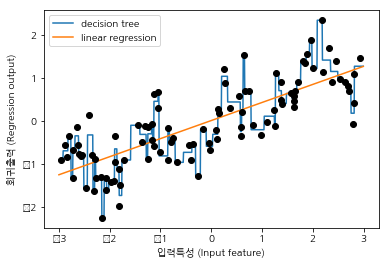

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀출력 (Regression output)")
plt.xlabel("입력특성 (Input feature)")
plt.legend(loc="best")

In [12]:
# -3 ~ 3 사이의 구간을 11개로 나눠서, 10개의 구간을 추출한다
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [13]:
# 각 데이터 값들이 어느 구간에 속하는지를 기록한다
which_bin = np.digitize(X, bins=bins)
print("\n데이터 포인트(Data points):\n", X[:5])
print("\n데이터 포인트의 소속 구간(Bin membership for data points):\n", which_bin[:5])


데이터 포인트(Data points):
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간(Bin membership for data points):
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False) 
encoder.fit(which_bin)                  # encoder.fit() : which_bin에 나타난 유일한 값을 찾는다
X_binned = encoder.transform(which_bin) # One-Hot-Encoding 으로 변환한다
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [15]:
# 구간을 10개로 정의하여, 변환된 데이터셋 X_binned는 10개의 특성으로 구성된다
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


In [16]:
# One-Hot-Encoding 변환데이터로 선형회귀 모델과 결정트리 모델을 생성한다

# line x축 연속 데이터를 bins 만큼 복/붙한다 ()
line_binned = encoder.transform(np.digitize(line, bins=bins))
print(line.shape)
print(line_binned.shape)

(1000, 1)
(1000, 10)


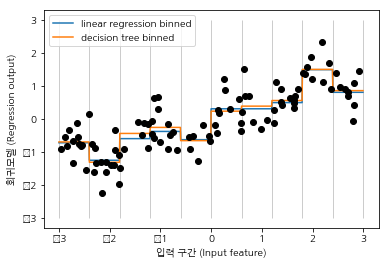

In [17]:
reg = LinearRegression().fit(X_binned, y) # 선형회귀 모델링
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y) # 의사결정회귀 모델링
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc = "best")
plt.ylabel("회귀모델 (Regression output)")
plt.xlabel("입력 구간 (Input feature)")

<br></br>
## 3 상호작용과 다항식
특성을 풍부하게 나타내도록, 상호작용(interaction)과 다항식(polynomial)을 추가한다

이는 통계적 분석기법중 하나로, 머신러닝에서도 많이 적용한다
### 01 데이터의 차원을 추가
https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/

np.hstack() : 행의 수가 같은 두 개 이상의 배열을 연결, 필드추가 (차원이 늘어난다)

In [18]:
X_combined = np.hstack([X, X_binned])
print(X.shape)
print(X_binned.shape)
print(X_combined.shape)

(100, 1)
(100, 10)
(100, 11)


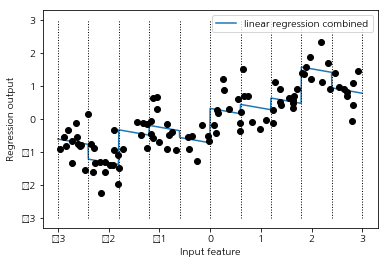

In [19]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, 
         reg.predict(line_combined), 
         label = 'linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

# 학습결과 해석
# 기울기가 '-'이고, 구간별 기울기가 같아서 식별력이 낮다

### 02 데이터 상호작용 특성으로 차원을 추가
<strong>X * X_binned</strong> : X_binned 은 One-Hot-encoding 로써, 해당 구간 값 이외는 0을 출력한다

<strong>구간별 기울기 조정</strong>을 위해서, <strong>데이터포인트 구간 (X)과, x축 사이의 상호작용 특성</strong>을 추가한다 (X * X_binned)

In [20]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


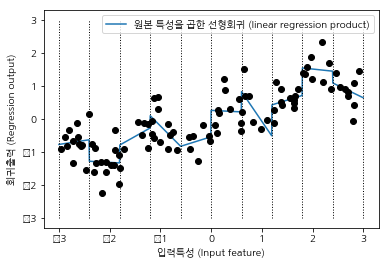

In [21]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형회귀 (linear regression product)')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀출력 (Regression output)")
plt.xlabel("입력특성 (Input feature)")
plt.legend(loc="best")

# 구간 나누기를 통해서 연속형 특성을 확장하였다

### 03 데이터 상호작용 특성을 <strong>다항식으로</strong> 차원을 추가
<strong>구간별 기울기 조정</strong>을 위해서, <strong>데이터포인트 구간 (X)과, x축 사이의 상호작용 특성</strong>을 추가한다 (X * X_binned)

<strong>X * X_binned</strong> : X_binned 은 One-Hot-encoding 로써, 해당 구간 값 이외는 0을 출력한다
#### 1) 다항식 분포 모델 만들기
Polynomial-Features

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10 까지 고차항을 추가한다
# "include_bias=True" 기본설정은, 절편을 위해서 값이 1인 특성을 추가한다
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: {}".format(X_poly.shape))
print("\nX 원소:\n{}".format(X[:5]))
print("\nX_poly 원소:\n{}".format(X_poly[:5]))

X_poly.shape: (100, 10)

X 원소:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

X_poly 원소:
[[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670e+

In [23]:
# .get_feature_names : 다항 수식표의 특성 차수를 출력
print("Polynomial 항의 이름 :\n{}".format(poly.get_feature_names()))

Polynomial 항의 이름 :
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


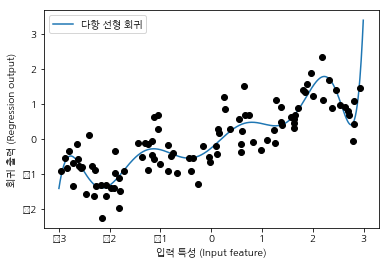

In [24]:
# 다항회귀모델 (polynomial regression) : 다항식 특성을 선형모델에 적용
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력 (Regression output)")
plt.xlabel("입력 특성 (Input feature)")
plt.legend(loc="best")
# 다항식의 특성으로, 1차원 데이터 셋에서도 부드러운 곡선이 출력된다
# 하지만 데이터가 부족한 경우, 민감한 기울기 변화가 나타나는 단점이 있다

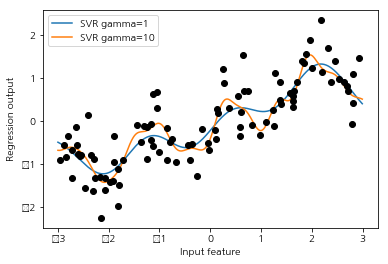

In [25]:
# 원본데이터 SVM 모델 학습결과와 비교
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

# 별도의 다항식 처리 없이도 SVM만으로도 위와 비슷한 모델을 생성가능

#### 2) 실전 데이터에 적용한 데이터 분석 모델링
Boston 주택가격 데이터셋에 다항모델 만들기

In [26]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# 다항모델 만들기 : 특성 출력
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("\nX_train_poly.shape: {}".format(X_train_poly.shape))

# 전체특성이 13개여서,  x0 ~ x12 의 조합 결과를 출력한다
print("\nPolynomial feature names:\n{}".format(poly.get_feature_names()))

X_train.shape: (379, 13)

X_train_poly.shape: (379, 105)

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11

#### 3) 상호작용 특성이 있는 데이터와, 없는 데이터를 Ridge 를 사용해 비교
Boston 주택가격 데이터셋에 다항모델 만들기

In [28]:
from sklearn.linear_model import Ridge

# 원본 데이터 적용
ridge = Ridge().fit(X_train_scaled, y_train)
print("원본 데이터의  Ridge 모델: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))

# 상호작용 특성을 추가한 데이터 적용
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성의 Ridge 모델: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

원본 데이터의  Ridge 모델: 0.621
상호작용 특성의 Ridge 모델: 0.753


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("원본 데이터의  RandomForest 모델: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("상호작용 특성의 RandomForest 모델: {:.3f}".format(rf.score(X_test_poly, y_test)))

원본 데이터의  RandomForest 모델: 0.784
상호작용 특성의 RandomForest 모델: 0.772


In [30]:
# Ridge 같은 일반모델은 특성추가가 효과가 있지만
# RandomForest 같은 복잡모델은 특성추가가 오히려 성능향상에 방해가 된다

<br></br>
## 4 일변량 비선형 변환
제곱근 이외에도 <strong>$Log, exp, sin()$ 수학함수</strong>의 적용도 특성변환에 유용하다
모델을 기초로 비교하
1. Tree 기반 모델 : <strong>특성의 순서</strong>에 영향
2. 선형/신경망 모델 : <strong>특성의 스케일과 분포</strong>에 밀접한 연관성을 갖는다. 특히 모델과 Target간 비선형성이 존재시 모델 만들기가 어렵다

$Log, exp$ 함수 : 데이터 스케일을 변환하여 선형/신경망 모델의 성능을 향상시킨다

$Sin, Cos$ 함수 : 주기적 패턴을 다룰 때 편리하다